[DATA](https://github.com/Jjioo/data)

In [ ]:
system("git --version")

In [ ]:
# Clone the GitHub repository
system("git clone https://github.com/Jjioo/data")

# **1.** Install Required Libraries

In [2]:
# Install libraries if not already installed
if (!require(ggplot2)) install.packages("ggplot2", dependencies = TRUE)
if (!require(factoextra)) install.packages("factoextra", dependencies = TRUE)
if (!require(cluster)) install.packages("cluster", dependencies = TRUE)

# Load libraries
library(ggplot2)
library(factoextra)
library(cluster)

# **2.** Display Data Before Classification

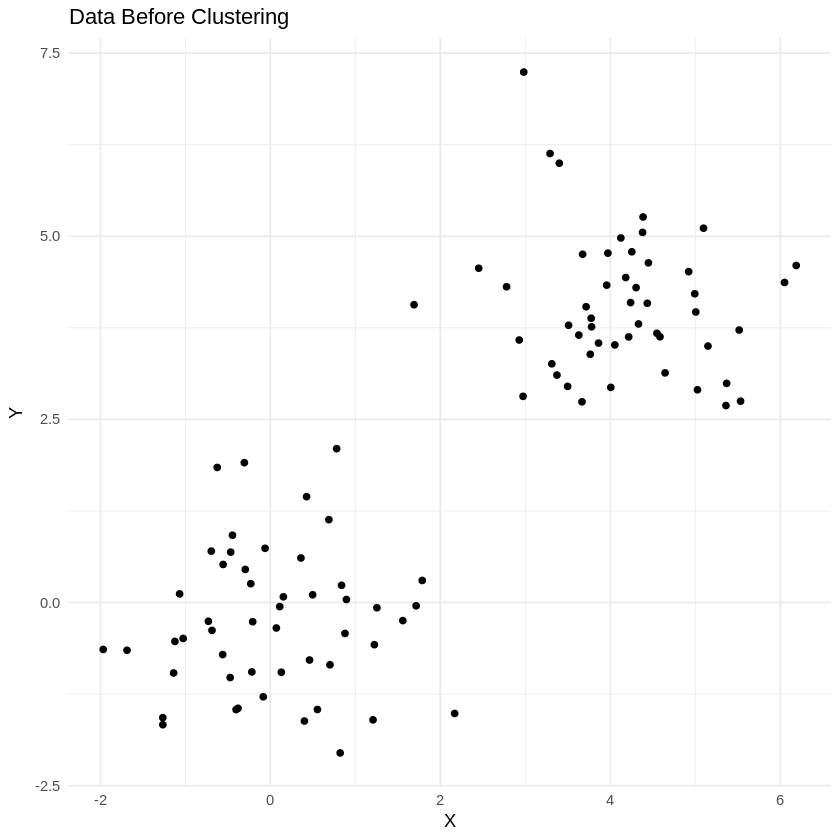

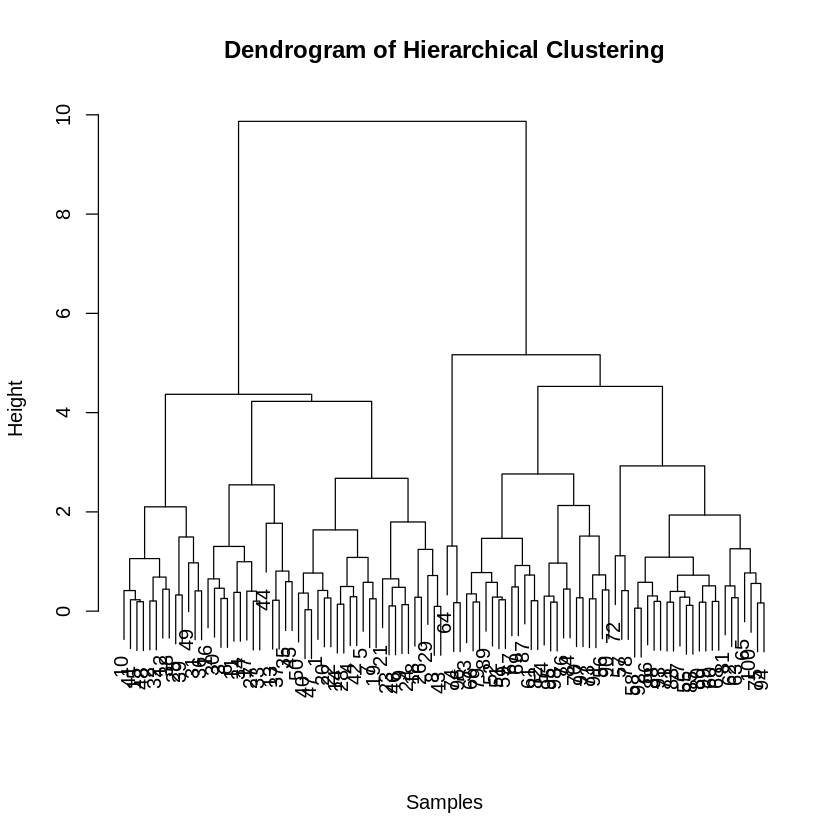

In [15]:
# Load required libraries
library(ggplot2)
library(cluster)

# Set random seed for reproducibility
set.seed(123)

#for txt data
#donnees <- read.table("path_to_your_file.txt", header = TRUE, sep = ",")


#for csv data
#donnees <- read.csv("path_to_your_file.csv", header = TRUE)

# Generate random data
donnees <- data.frame(
  X = c(rnorm(50, mean = 0, sd = 1), rnorm(50, mean = 4, sd = 1)),
  Y = c(rnorm(50, mean = 0, sd = 1), rnorm(50, mean = 4, sd = 1))
)

# Visualize the data before classification
ggplot(donnees, aes(x = X, y = Y)) +
  geom_point() +
  ggtitle("Data Before Clustering") +
  theme_minimal()

# Compute the distance matrix
dist_matrix <- dist(donnees)

# Perform hierarchical clustering
hc <- hclust(dist_matrix)

# Plot the dendrogram
plot(hc, main = "Dendrogram of Hierarchical Clustering", xlab = "Samples", sub = "")

# **Step 3:** Define Function to Compute Average Silhouette Width

In [5]:
# Function to compute average silhouette width
compute_silhouette <- function(data, k) {
  km <- kmeans(data, centers = k, nstart = 25)
  ss <- silhouette(km$cluster, dist(data))
  return(mean(ss[, "sil_width"]))
}


# **Step 4:** Compute Silhouette Scores for Different Clusters

In [6]:
# Compute silhouette scores for 1 to 10 clusters
silhouette_scores <- sapply(1:10, function(k) {
  if(k == 1) return(NA)  # Silhouette doesn't make sense for 1 cluster
  compute_silhouette(donnees, k)
})

# Remove NA for 1 cluster
silhouette_scores <- silhouette_scores[-1]


# **Step 5**: Find Optimal Number of Clusters and Print It

In [7]:
# Find the number of clusters with the highest silhouette score
optimal_k <- which.max(silhouette_scores) + 1

# Print the optimal number of clusters
cat("Optimal number of clusters:", optimal_k, "\n")


Optimal number of clusters: 2 


# **Step 6**: Perform K-means Clustering with the Optimal Number of Clusters

In [8]:
# Perform K-means with the optimal number of clusters
kmeans_result <- kmeans(donnees, centers = optimal_k, nstart = 25)


# **Step 7**: Visualize the Clustering Results

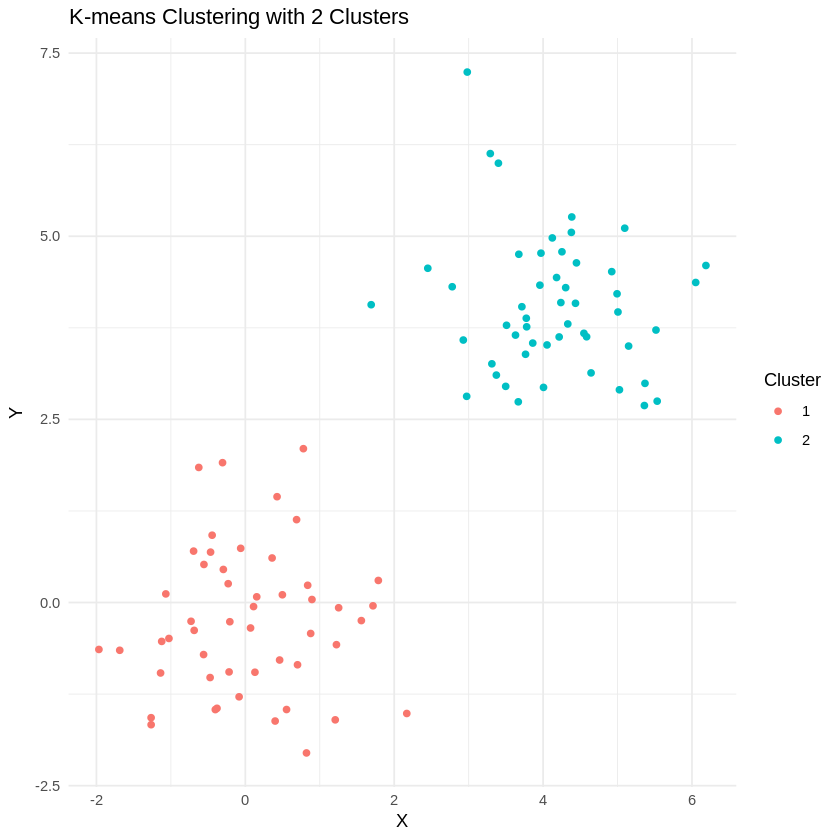

In [9]:
# Visualize the clustering result
ggplot(cbind(donnees, Cluster = factor(kmeans_result$cluster)),
       aes(x = X, y = Y, color = Cluster)) +
  geom_point() +
  ggtitle(paste("K-means Clustering with", optimal_k, "Clusters")) +
  theme_minimal()


# **Step 8**: Plot Silhouette Scores for Different Clusters (Optional)

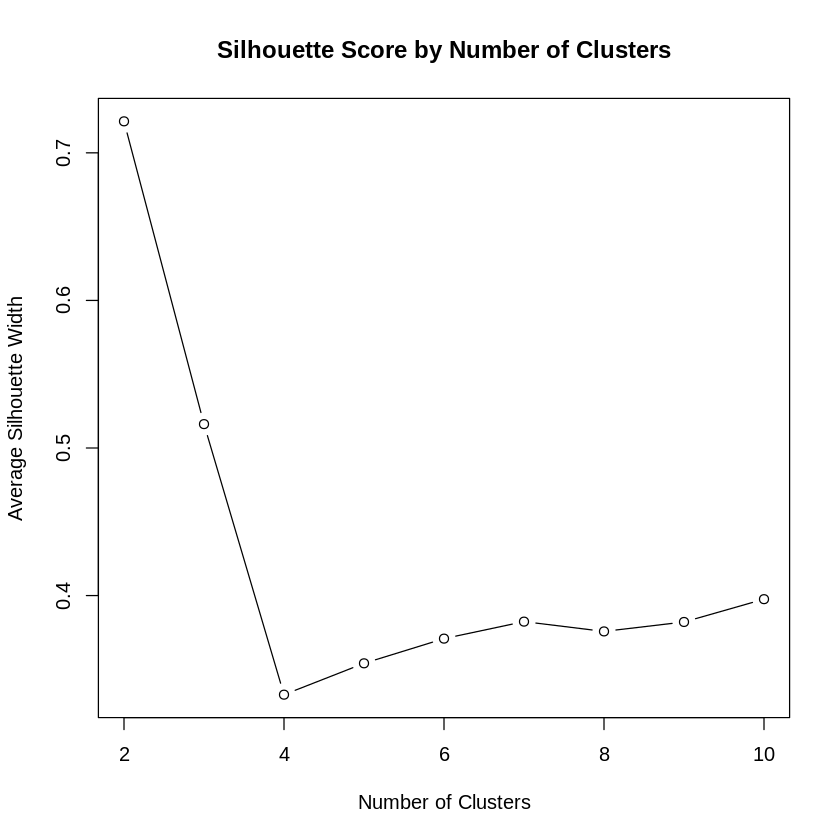

In [11]:
# Optional: Plot silhouette scores for visualization
plot(2:10, silhouette_scores, type = "b",
     xlab = "Number of Clusters",
     ylab = "Average Silhouette Width",
     main = "Silhouette Score by Number of Clusters")
